In [1]:
import pandas as pd
import numpy as np
import os

# Load and format data

In [2]:
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv(os.path.join("data", "model_data.csv"))

In [4]:
data

,state,county,race_whtnothsp_pct,race_blkafr_pct,race_amrindalsk_pct,race_asn_pct,race_hwnpcf_pct,race_multi_pct,race_hspltn_pct,college_edu_pct,poverty_pct,partisan_score
0,Alabama,Autauga,74.3,19.6,0.5,1.2,0.1,1.8,3.0,25.0,13.4,-5
1,Alabama,Baldwin,83.1,8.9,0.8,1.2,0.1,1.8,4.6,30.7,10.1,-5
2,Alabama,Barbour,45.6,48.4,0.7,0.5,0.2,1.2,4.3,12.0,33.4,-1
3,Alabama,Bibb,74.6,21.3,0.4,0.2,0.1,1.1,2.6,13.2,20.2,-5
4,Alabama,Blount,86.9,1.6,0.7,0.3,0.1,1.4,9.6,13.1,12.8,-5
...,...,...,...,...,...,...,...,...,...,...,...,...
3104,Wyoming,Sweetwater,79.3,1.4,1.5,1.0,0.2,2.1,16.1,22.2,10.0,-5
3105,Wyoming,Teton,81.5,0.8,0.9,1.4,0.2,1.6,14.9,54.1,5.8,-5
3106,Wyoming,Uinta,87.4,0.8,1.4,0.5,0.1,1.8,9.2,17.4,10.2,-5
3107,Wyoming,Washakie,82.4,0.5,1.8,0.8,0.1,2.3,14.1,21.0,10.7,-5


In [5]:
features = data.drop(columns=["state", "county", "partisan_score"]).to_numpy()

In [6]:
features

array([[74.3, 19.6,  0.5, ...,  3. , 25. , 13.4],
       [83.1,  8.9,  0.8, ...,  4.6, 30.7, 10.1],
       [45.6, 48.4,  0.7, ...,  4.3, 12. , 33.4],
       ...,
       [87.4,  0.8,  1.4, ...,  9.2, 17.4, 10.2],
       [82.4,  0.5,  1.8, ..., 14.1, 21. , 10.7],
       [90. ,  0.7,  1.8, ...,  4.1, 19.8, 10.6]])

In [7]:
labels = data.drop(data.columns.difference(["partisan_score"]), axis=1)["partisan_score"].to_numpy()

In [8]:
labels

array([-5, -5, -1, ..., -5, -5, -5])

In [9]:
county_names = data.drop(data.columns.difference(["state", "county"]), axis=1).to_numpy()

In [10]:
county_names

array([['Alabama', 'Autauga'],
       ['Alabama', 'Baldwin'],
       ['Alabama', 'Barbour'],
       ...,
       ['Wyoming', 'Uinta'],
       ['Wyoming', 'Washakie'],
       ['Wyoming', 'Weston']], dtype=object)

# PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)
eigenbasis = pca.fit(features)
features2d = eigenbasis.transform(features)

In [13]:
pca.explained_variance_ratio_

array([0.58427342, 0.22938907])

In [14]:
pca.components_

array([[-0.82696863,  0.40331307,  0.05282247,  0.02675821,  0.0020572 ,
         0.00813844,  0.36360679, -0.01982384,  0.13146061],
       [-0.05266462, -0.69849393,  0.04896912,  0.02637327,  0.00277557,
         0.01203727,  0.69561176,  0.07921626, -0.12623631]])

## Plot PCA stuff

In [15]:
# Import matplotlib stuff
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [16]:
def plot_pca_2d():
    colors = ["darkred", "red", "tomato", "lightsalmon", "peachpuff", "lime", "lightcyan", "paleturquoise", "lightskyblue", "dodgerblue", "navy"]
    for color, label in zip(colors, np.unique(labels)):
        plt.scatter(features2d[labels == label, 0], features2d[labels == label, 1], color=color, label=label)
    plt.legend(loc="best")
    plt.title("PCA of Demographic Features")
    plt.show()

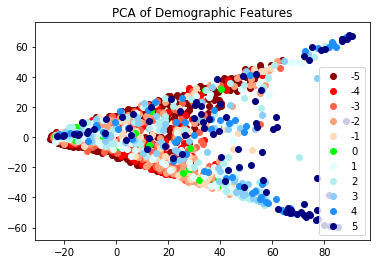

In [17]:
plot_pca_2d()

## Visualize clustering on the the 2d dataset

First with as many clusters as we have partisan scores

In [18]:
def plot_2d_clusters(clusters, features):
    colors = cm.rainbow(np.linspace(0, 1, len(np.unique(clusters))))
    for i in np.unique(clusters):
        plt.scatter(features[clusters == i, 0], features[clusters == i, 1], color=colors[i], marker='o', edgecolor="black", label=i)
    plt.legend(scatterpoints=1)
    plt.show()

In [19]:
def print_cluster_info(clusters):
    avg_stddev = np.mean([np.std(labels[np.where(clusters == i)]) for i in np.unique(clusters)])
    print("Average partisan score stddev for {} clusters: {}".format(len(np.unique(clusters)), round(avg_stddev, 1)))
    print()
    
    for i in np.unique(clusters):
        print("cluster {}:".format(i))
    
        partisan_scores = labels[np.where(clusters == i)]
        cluster_features = features[clusters == i]
    
        print("\tAverage partisan score: {} +/- {}".format(round(np.mean(partisan_scores), 1), round(np.std(partisan_scores, ddof=1), 1)))
        print()
    
        republican_pct = round(len(partisan_scores[partisan_scores < 0]) / len(partisan_scores) * 100, 1)
        democrat_pct = round(len(partisan_scores[partisan_scores > 0]) / len(partisan_scores) * 100, 1)
        even_pct = round(len(partisan_scores[partisan_scores == 0]) / len(partisan_scores) * 100, 1)
        
        pie_colors = ["red", "blue"]
        pie_labels = ["republican – {}%".format(republican_pct), "democrat – {}%".format(democrat_pct)]
        pie_percentages = [republican_pct, democrat_pct]
        
        if even_pct:
            pie_colors.append("purple")
            pie_labels.append("even – {}%".format(even_pct))
            pie_percentages.append(even_pct)
        
        patches, texts = plt.pie(pie_percentages, colors=pie_colors)
        plt.legend(patches, pie_labels, loc="center left", bbox_to_anchor=(-0.1, 1.1))
        plt.show()
        
        pie_percentages = [round(len(partisan_scores[partisan_scores == score]) / len(partisan_scores) * 100, 1) for score in np.unique(labels)]
        pie_colors = ["darkred", "red", "tomato", "lightsalmon", "peachpuff", "purple", "lightcyan", "paleturquoise", "lightskyblue", "dodgerblue", "navy"]
        pie_labels = ["{} – {}%".format(label, percentage) for label, percentage in zip(np.unique(labels), pie_percentages)]
        
        patches, texts = plt.pie(pie_percentages, colors=pie_colors)
        plt.legend(patches, pie_labels, loc="center left", bbox_to_anchor=(-0.1, 1.3))
        plt.show()
        
        avg_wht_not_hsp = round(np.mean(cluster_features[:, 0]), 1)
        wht_not_hsp_stddev = round(np.std(cluster_features[:, 0]), 1)
        print("\tAverage white not hispanic: {} +/- {}%".format(avg_wht_not_hsp, wht_not_hsp_stddev))
        
        avg_blk = round(np.mean(cluster_features[:, 1]), 1)
        blk_stddev = round(np.std(cluster_features[:, 1]), 1)
        print("\tAverage black: {} +/- {}%".format(avg_blk, blk_stddev))
        
        avg_hsp = round(np.mean(cluster_features[:, -3]), 1)
        hsp_stddev = round(np.std(cluster_features[:, -3]), 1)
        print("\tAverage hispanic: {} +/- {}%".format(avg_hsp, hsp_stddev))
        
        avg_college_educated = round(np.mean(cluster_features[:, -2]), 1)
        college_educated_stddev = round(np.std(cluster_features[:, -2]), 1)
        print("\tAverage college educated: {} +/- {}%".format(avg_college_educated, college_educated_stddev))
        
        avg_poverty = round(np.mean(cluster_features[:, -1]), 1)
        poverty_stddev = round(np.std(cluster_features[:, -1]), 1)
        print("\tAverage poverty: {} +/- {}%".format(avg_poverty, poverty_stddev))
        
        print()
        print()

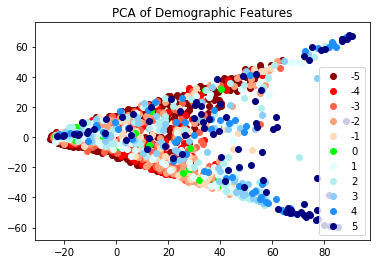

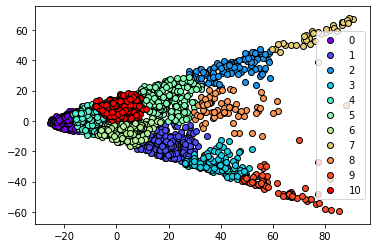

Average partisan score stddev for 11 clusters: 2.5

cluster 0:
	Average partisan score: -4.3 +/- 1.6



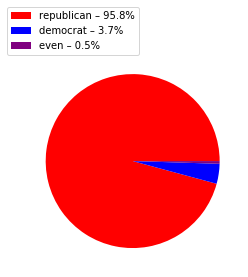

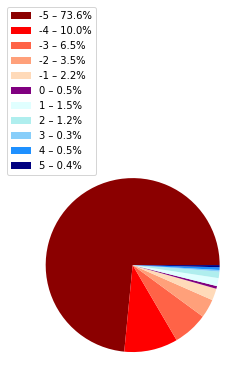

	Average white not hispanic: 93.6 +/- 2.1%
	Average black: 1.3 +/- 1.2%
	Average hispanic: 2.6 +/- 1.3%
	Average college educated: 19.4 +/- 6.9%
	Average poverty: 13.7 +/- 5.2%


cluster 1:
	Average partisan score: -2.8 +/- 2.4



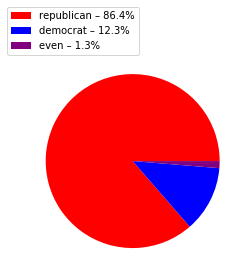

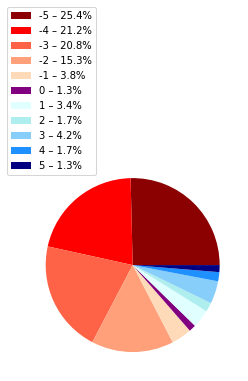

	Average white not hispanic: 61.5 +/- 4.7%
	Average black: 29.3 +/- 4.8%
	Average hispanic: 5.9 +/- 4.0%
	Average college educated: 20.3 +/- 9.6%
	Average poverty: 19.1 +/- 5.1%


cluster 2:
	Average partisan score: -2.6 +/- 3.1



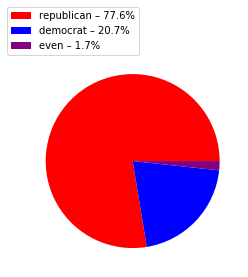

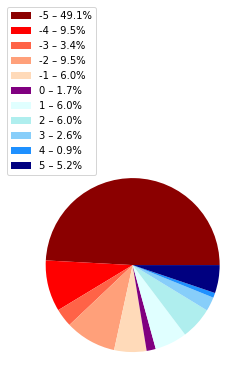

	Average white not hispanic: 39.7 +/- 7.7%
	Average black: 3.9 +/- 2.9%
	Average hispanic: 52.1 +/- 8.1%
	Average college educated: 18.1 +/- 7.2%
	Average poverty: 17.2 +/- 4.7%


cluster 3:
	Average partisan score: -0.1 +/- 2.4



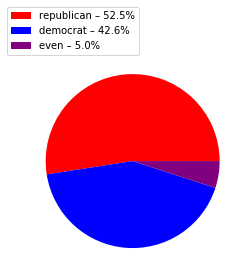

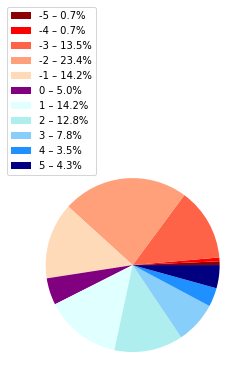

	Average white not hispanic: 47.4 +/- 5.9%
	Average black: 45.4 +/- 5.3%
	Average hispanic: 4.5 +/- 3.2%
	Average college educated: 17.1 +/- 8.2%
	Average poverty: 22.9 +/- 5.3%


cluster 4:
	Average partisan score: -3.6 +/- 2.2



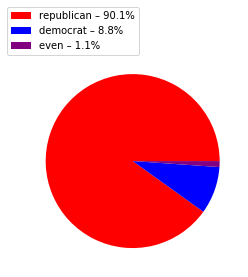

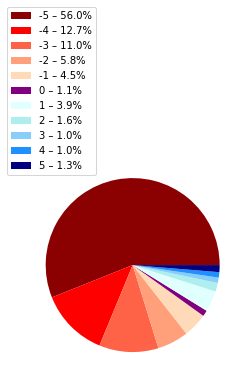

	Average white not hispanic: 85.3 +/- 2.9%
	Average black: 3.8 +/- 3.1%
	Average hispanic: 6.2 +/- 2.9%
	Average college educated: 24.2 +/- 9.7%
	Average poverty: 13.2 +/- 4.4%


cluster 5:
	Average partisan score: -2.8 +/- 3.1



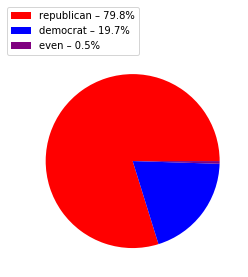

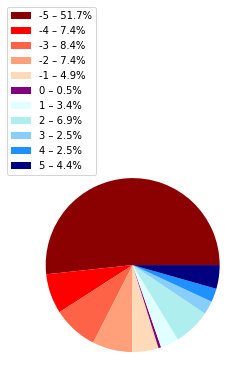

	Average white not hispanic: 59.1 +/- 5.9%
	Average black: 6.8 +/- 5.7%
	Average hispanic: 26.5 +/- 8.3%
	Average college educated: 23.6 +/- 11.8%
	Average poverty: 15.1 +/- 5.2%


cluster 6:
	Average partisan score: -3.6 +/- 2.4



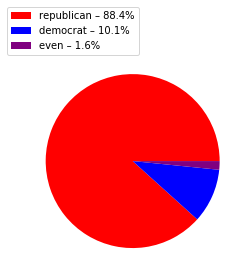

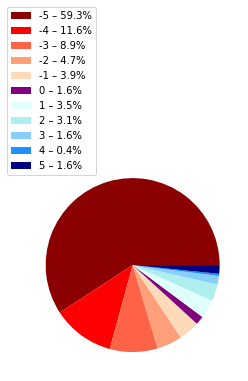

	Average white not hispanic: 73.8 +/- 4.9%
	Average black: 15.3 +/- 4.3%
	Average hispanic: 5.8 +/- 3.1%
	Average college educated: 22.1 +/- 10.0%
	Average poverty: 15.6 +/- 4.8%


cluster 7:
	Average partisan score: 2.6 +/- 3.0



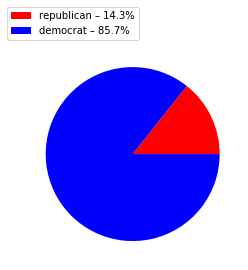

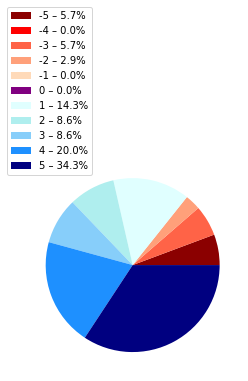

	Average white not hispanic: 13.9 +/- 7.1%
	Average black: 2.5 +/- 3.0%
	Average hispanic: 82.1 +/- 8.8%
	Average college educated: 14.4 +/- 5.7%
	Average poverty: 25.0 +/- 5.4%


cluster 8:
	Average partisan score: 1.2 +/- 3.6



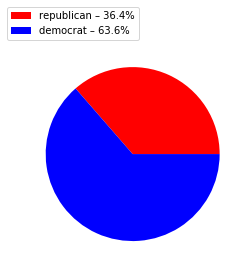

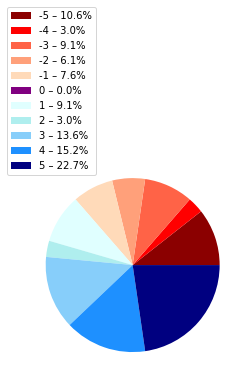

	Average white not hispanic: 34.6 +/- 12.0%
	Average black: 13.5 +/- 11.6%
	Average hispanic: 20.9 +/- 12.8%
	Average college educated: 25.0 +/- 11.8%
	Average poverty: 21.1 +/- 11.8%


cluster 9:
	Average partisan score: 3.7 +/- 1.3



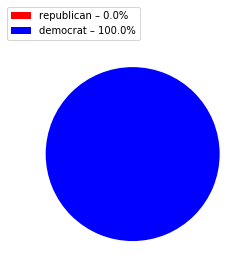

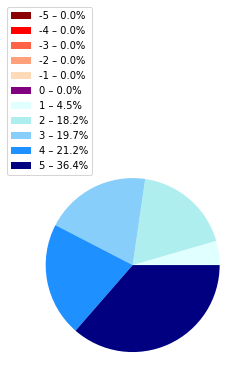

	Average white not hispanic: 28.6 +/- 7.6%
	Average black: 65.8 +/- 8.3%
	Average hispanic: 4.0 +/- 4.7%
	Average college educated: 16.1 +/- 6.6%
	Average poverty: 30.1 +/- 7.2%


cluster 10:
	Average partisan score: -3.4 +/- 2.5



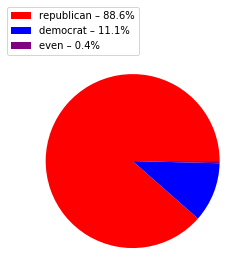

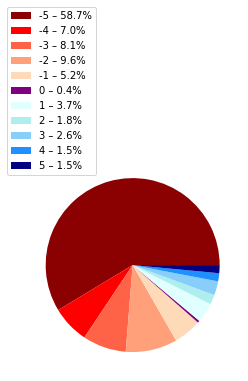

	Average white not hispanic: 74.6 +/- 4.6%
	Average black: 3.3 +/- 2.9%
	Average hispanic: 14.9 +/- 5.2%
	Average college educated: 24.3 +/- 10.5%
	Average poverty: 13.4 +/- 4.3%




In [20]:
clusters2d = KMeans(n_clusters=len(np.unique(labels))).fit_predict(features2d)
plot_pca_2d()
plot_2d_clusters(clusters2d, features2d)
print_cluster_info(clusters2d)

Let's see if reducing the number of clusters yields a better generalization

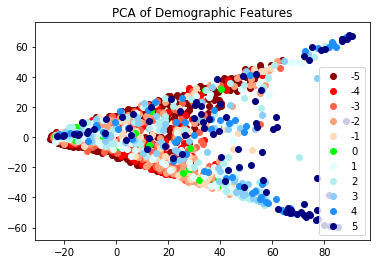

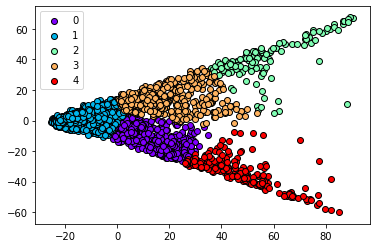

Average partisan score stddev for 5 clusters: 2.9

cluster 0:
	Average partisan score: -3.1 +/- 2.4



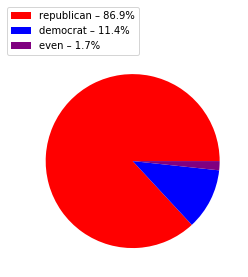

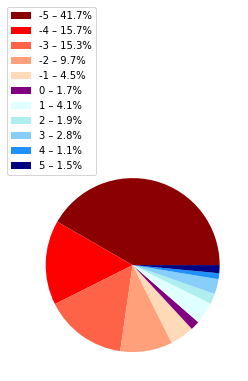

	Average white not hispanic: 66.4 +/- 6.8%
	Average black: 22.4 +/- 8.7%
	Average hispanic: 6.3 +/- 3.9%
	Average college educated: 21.1 +/- 9.8%
	Average poverty: 17.6 +/- 5.1%


cluster 1:
	Average partisan score: -4.0 +/- 1.9



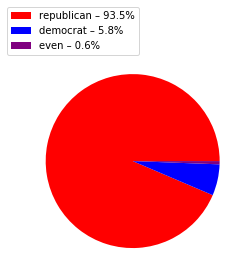

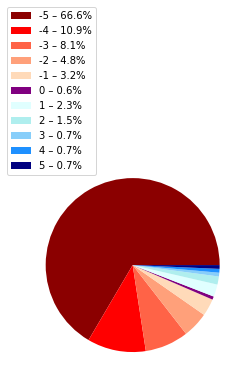

	Average white not hispanic: 89.2 +/- 6.0%
	Average black: 2.6 +/- 2.9%
	Average hispanic: 4.7 +/- 3.8%
	Average college educated: 21.4 +/- 8.7%
	Average poverty: 13.5 +/- 4.8%


cluster 2:
	Average partisan score: -0.5 +/- 3.9



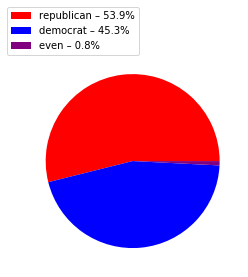

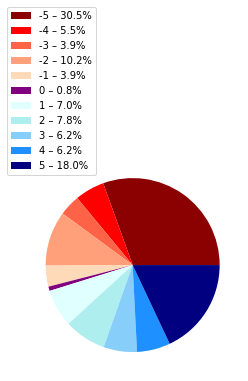

	Average white not hispanic: 28.6 +/- 12.3%
	Average black: 4.4 +/- 5.5%
	Average hispanic: 60.4 +/- 17.9%
	Average college educated: 16.8 +/- 6.6%
	Average poverty: 20.4 +/- 7.0%


cluster 3:
	Average partisan score: -2.4 +/- 3.3



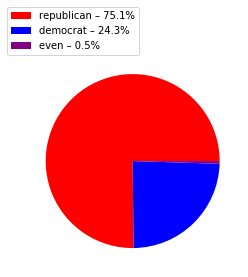

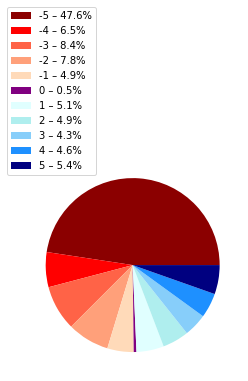

	Average white not hispanic: 58.0 +/- 11.8%
	Average black: 6.3 +/- 6.3%
	Average hispanic: 25.6 +/- 10.1%
	Average college educated: 24.2 +/- 11.5%
	Average poverty: 15.3 +/- 6.6%


cluster 4:
	Average partisan score: 1.1 +/- 2.7



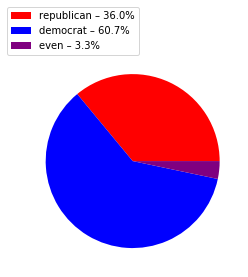

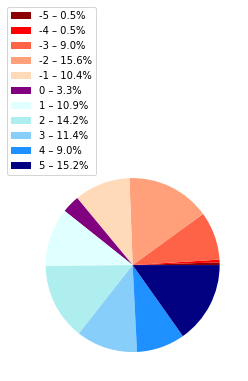

	Average white not hispanic: 41.2 +/- 10.9%
	Average black: 51.6 +/- 11.6%
	Average hispanic: 4.6 +/- 4.2%
	Average college educated: 16.9 +/- 7.9%
	Average poverty: 25.1 +/- 6.9%




In [21]:
clusters2d = KMeans(n_clusters=5).fit_predict(features2d)
plot_pca_2d()
plot_2d_clusters(clusters2d, features2d)
print_cluster_info(clusters2d)

Try with different numbers of clusters

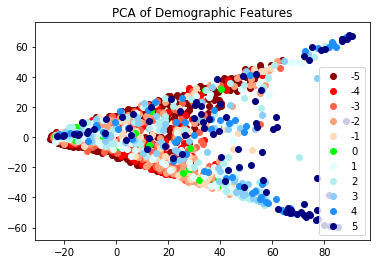

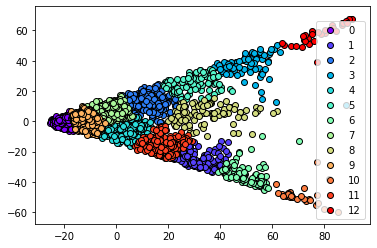

Average partisan score stddev for 13 clusters: 2.4

cluster 0:
	Average partisan score: -4.3 +/- 1.6



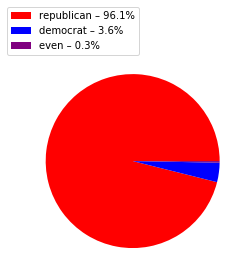

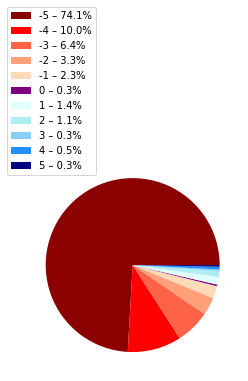

	Average white not hispanic: 93.8 +/- 2.0%
	Average black: 1.2 +/- 1.1%
	Average hispanic: 2.5 +/- 1.2%
	Average college educated: 19.3 +/- 6.8%
	Average poverty: 13.6 +/- 5.1%


cluster 1:
	Average partisan score: -1.4 +/- 2.0



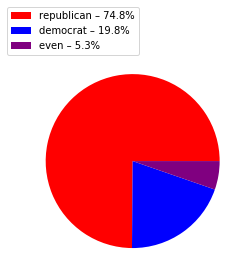

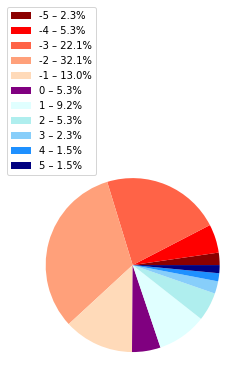

	Average white not hispanic: 52.3 +/- 4.8%
	Average black: 40.5 +/- 4.1%
	Average hispanic: 4.5 +/- 3.1%
	Average college educated: 17.8 +/- 8.0%
	Average poverty: 21.9 +/- 4.6%


cluster 2:
	Average partisan score: -2.8 +/- 2.9



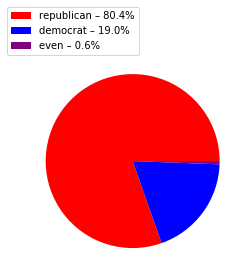

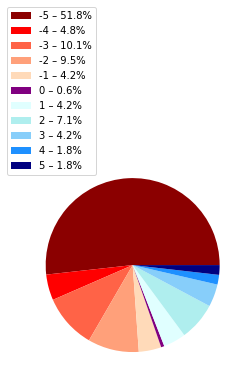

	Average white not hispanic: 65.0 +/- 4.7%
	Average black: 5.6 +/- 4.6%
	Average hispanic: 22.5 +/- 5.9%
	Average college educated: 25.0 +/- 11.2%
	Average poverty: 13.4 +/- 4.7%


cluster 3:
	Average partisan score: -2.0 +/- 3.4



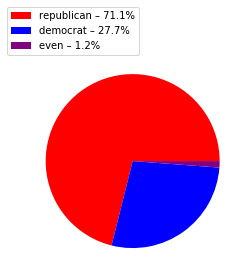

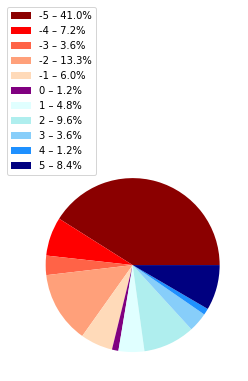

	Average white not hispanic: 34.0 +/- 6.8%
	Average black: 4.9 +/- 5.8%
	Average hispanic: 56.3 +/- 8.2%
	Average college educated: 17.1 +/- 6.5%
	Average poverty: 18.2 +/- 5.2%


cluster 4:
	Average partisan score: -3.5 +/- 2.4



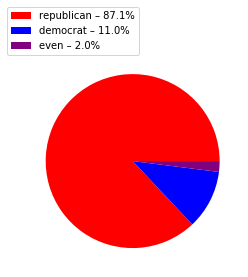

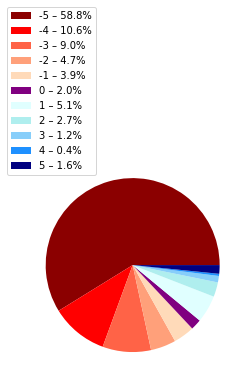

	Average white not hispanic: 74.0 +/- 4.8%
	Average black: 14.6 +/- 4.4%
	Average hispanic: 5.9 +/- 3.2%
	Average college educated: 22.3 +/- 10.1%
	Average poverty: 15.6 +/- 4.8%


cluster 5:
	Average partisan score: -3.0 +/- 3.2



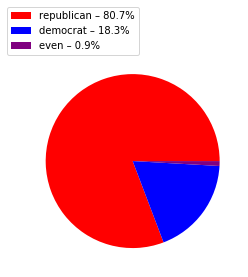

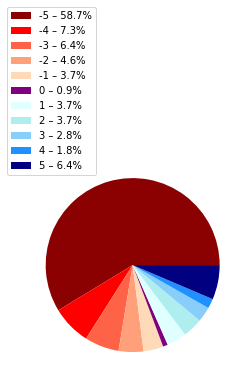

	Average white not hispanic: 51.6 +/- 6.3%
	Average black: 4.3 +/- 3.4%
	Average hispanic: 38.6 +/- 6.0%
	Average college educated: 21.4 +/- 9.2%
	Average poverty: 15.8 +/- 4.8%


cluster 6:
	Average partisan score: 2.2 +/- 1.7



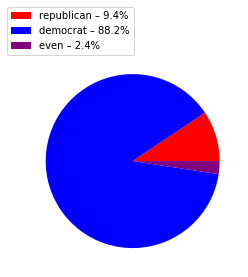

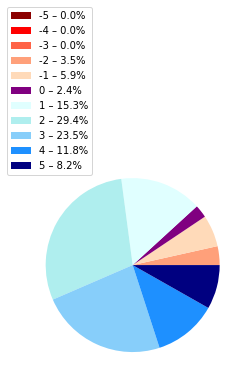

	Average white not hispanic: 38.2 +/- 4.6%
	Average black: 54.6 +/- 5.2%
	Average hispanic: 4.9 +/- 4.5%
	Average college educated: 17.0 +/- 8.7%
	Average poverty: 25.7 +/- 6.4%


cluster 7:
	Average partisan score: -3.3 +/- 2.6



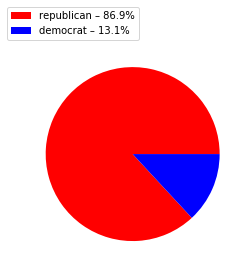

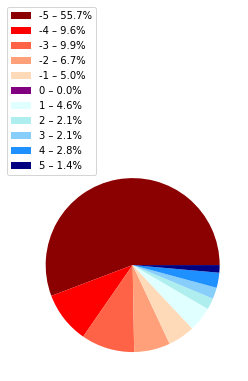

	Average white not hispanic: 77.5 +/- 4.0%
	Average black: 3.0 +/- 2.5%
	Average hispanic: 12.6 +/- 4.3%
	Average college educated: 25.6 +/- 11.7%
	Average poverty: 13.1 +/- 4.2%


cluster 8:
	Average partisan score: -0.3 +/- 3.7



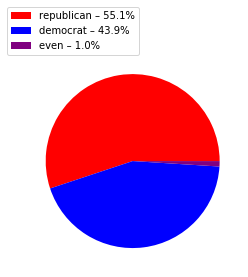

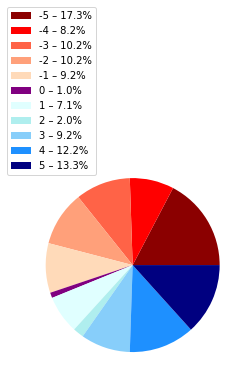

	Average white not hispanic: 43.4 +/- 13.4%
	Average black: 14.5 +/- 10.0%
	Average hispanic: 17.8 +/- 9.0%
	Average college educated: 24.9 +/- 12.7%
	Average poverty: 20.0 +/- 10.1%


cluster 9:
	Average partisan score: -3.8 +/- 2.1



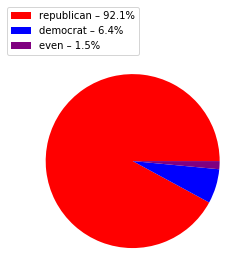

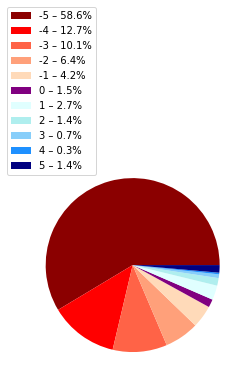

	Average white not hispanic: 86.3 +/- 2.6%
	Average black: 3.8 +/- 3.0%
	Average hispanic: 5.5 +/- 2.6%
	Average college educated: 23.3 +/- 9.0%
	Average poverty: 13.4 +/- 4.5%


cluster 10:
	Average partisan score: 4.7 +/- 0.5



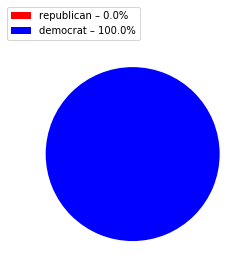

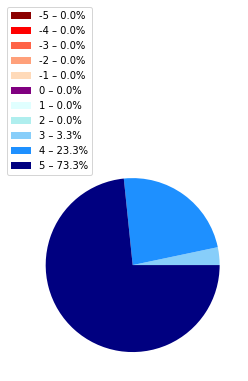

	Average white not hispanic: 21.8 +/- 5.5%
	Average black: 73.6 +/- 5.2%
	Average hispanic: 3.3 +/- 3.8%
	Average college educated: 16.1 +/- 5.1%
	Average poverty: 32.6 +/- 7.7%


cluster 11:
	Average partisan score: -3.0 +/- 2.4



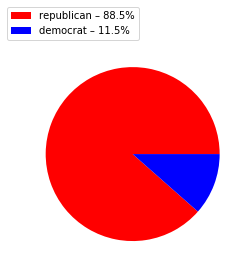

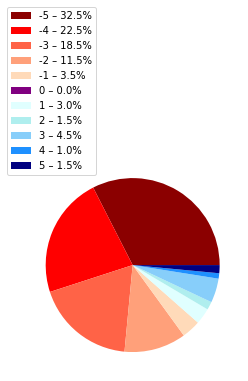

	Average white not hispanic: 63.4 +/- 4.1%
	Average black: 27.8 +/- 4.2%
	Average hispanic: 5.4 +/- 3.3%
	Average college educated: 19.9 +/- 9.2%
	Average poverty: 18.8 +/- 5.0%


cluster 12:
	Average partisan score: 3.2 +/- 2.4



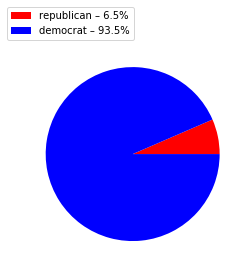

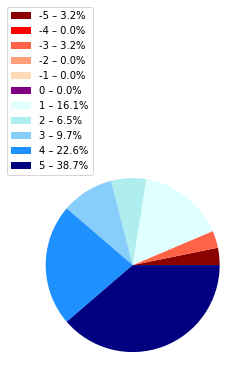

	Average white not hispanic: 12.3 +/- 5.9%
	Average black: 2.4 +/- 3.1%
	Average hispanic: 83.7 +/- 8.1%
	Average college educated: 14.2 +/- 5.4%
	Average poverty: 25.7 +/- 5.1%




In [22]:
clusters2d = KMeans(n_clusters=13).fit_predict(features2d)
plot_pca_2d()
plot_2d_clusters(clusters2d, features2d)
print_cluster_info(clusters2d)

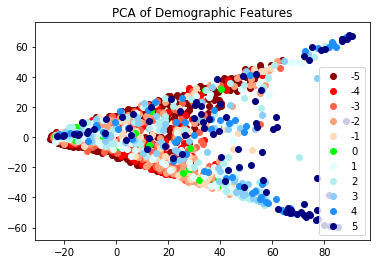

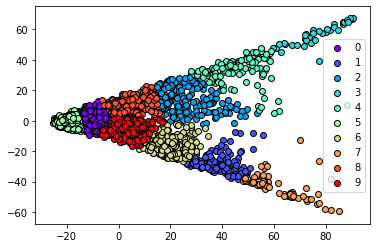

Average partisan score stddev for 10 clusters: 2.5

cluster 0:
	Average partisan score: -3.6 +/- 2.3



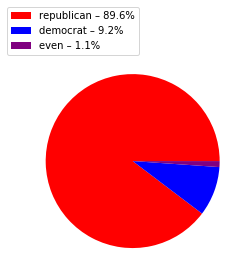

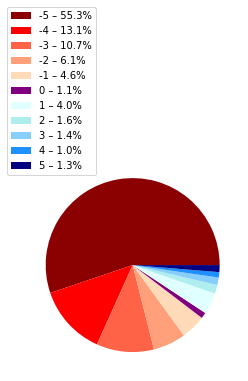

	Average white not hispanic: 84.6 +/- 3.2%
	Average black: 3.9 +/- 3.1%
	Average hispanic: 6.7 +/- 3.3%
	Average college educated: 24.4 +/- 9.8%
	Average poverty: 13.2 +/- 4.3%


cluster 1:
	Average partisan score: -0.1 +/- 2.4



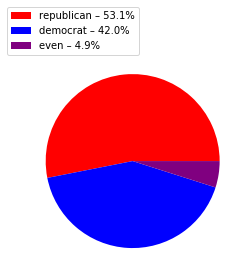

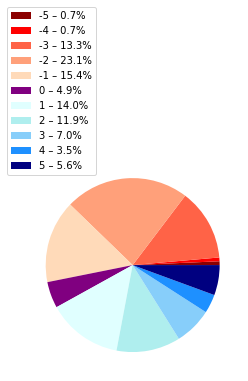

	Average white not hispanic: 47.1 +/- 6.3%
	Average black: 44.9 +/- 5.5%
	Average hispanic: 4.9 +/- 4.0%
	Average college educated: 17.4 +/- 8.4%
	Average poverty: 22.8 +/- 5.3%


cluster 2:
	Average partisan score: -1.8 +/- 3.6



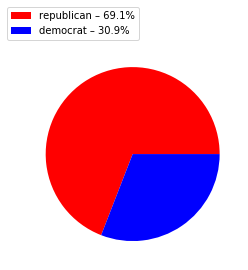

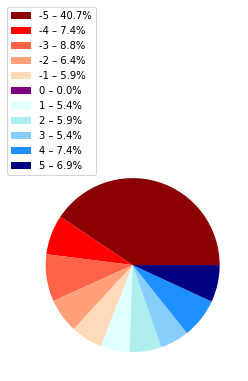

	Average white not hispanic: 52.0 +/- 10.4%
	Average black: 8.6 +/- 7.4%
	Average hispanic: 26.5 +/- 10.3%
	Average college educated: 24.1 +/- 12.0%
	Average poverty: 16.7 +/- 7.7%


cluster 3:
	Average partisan score: 2.6 +/- 2.9



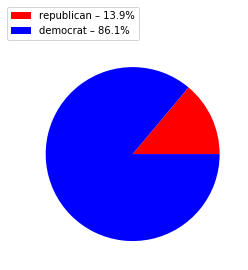

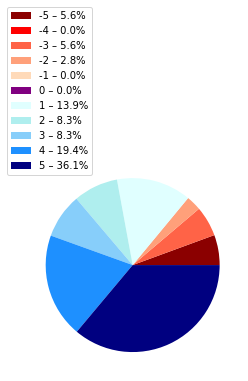

	Average white not hispanic: 13.8 +/- 7.0%
	Average black: 3.6 +/- 7.4%
	Average hispanic: 81.3 +/- 9.7%
	Average college educated: 14.5 +/- 5.6%
	Average poverty: 25.1 +/- 5.4%


cluster 4:
	Average partisan score: -2.1 +/- 3.5



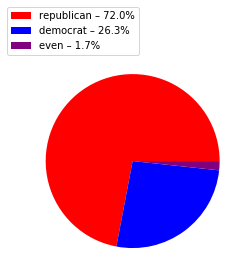

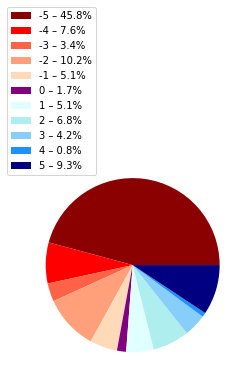

	Average white not hispanic: 37.2 +/- 9.3%
	Average black: 4.6 +/- 4.3%
	Average hispanic: 50.3 +/- 12.3%
	Average college educated: 18.4 +/- 7.5%
	Average poverty: 18.0 +/- 6.5%


cluster 5:
	Average partisan score: -4.3 +/- 1.6



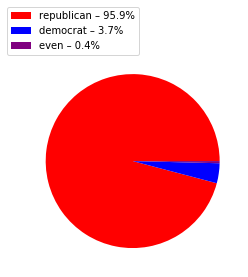

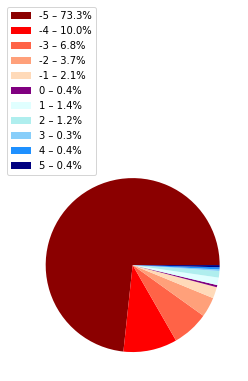

	Average white not hispanic: 93.4 +/- 2.2%
	Average black: 1.3 +/- 1.2%
	Average hispanic: 2.6 +/- 1.3%
	Average college educated: 19.5 +/- 7.0%
	Average poverty: 13.7 +/- 5.1%


cluster 6:
	Average partisan score: -2.8 +/- 2.4



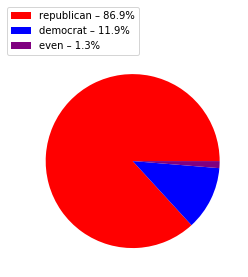

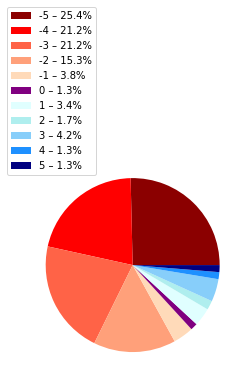

	Average white not hispanic: 61.5 +/- 4.7%
	Average black: 29.3 +/- 4.7%
	Average hispanic: 5.9 +/- 4.0%
	Average college educated: 20.2 +/- 9.6%
	Average poverty: 19.2 +/- 5.1%


cluster 7:
	Average partisan score: 3.6 +/- 1.3



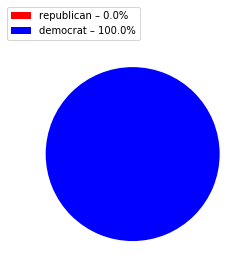

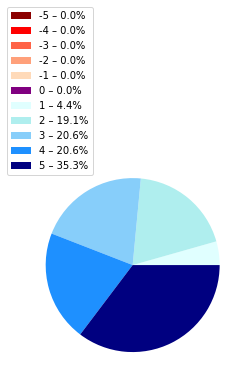

	Average white not hispanic: 28.9 +/- 7.7%
	Average black: 65.5 +/- 8.3%
	Average hispanic: 4.0 +/- 4.7%
	Average college educated: 16.1 +/- 6.5%
	Average poverty: 29.8 +/- 7.3%


cluster 8:
	Average partisan score: -3.3 +/- 2.7



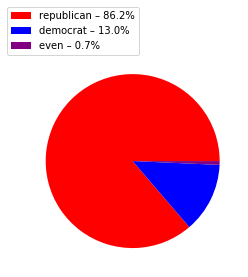

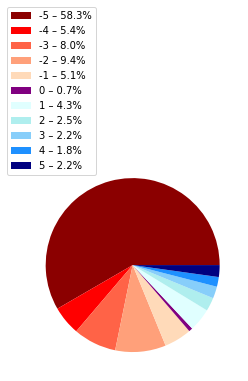

	Average white not hispanic: 71.6 +/- 5.3%
	Average black: 3.6 +/- 3.3%
	Average hispanic: 17.2 +/- 6.3%
	Average college educated: 24.1 +/- 10.8%
	Average poverty: 13.5 +/- 4.3%


cluster 9:
	Average partisan score: -3.6 +/- 2.3



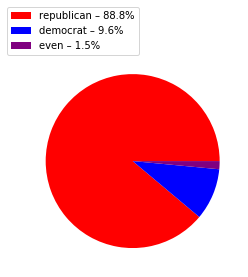

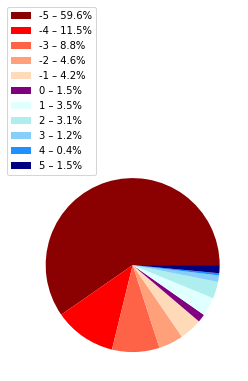

	Average white not hispanic: 73.7 +/- 4.8%
	Average black: 15.2 +/- 4.4%
	Average hispanic: 5.9 +/- 3.1%
	Average college educated: 22.0 +/- 9.9%
	Average poverty: 15.6 +/- 4.8%




In [23]:
clusters2d = KMeans(n_clusters=10).fit_predict(features2d)
plot_pca_2d()
plot_2d_clusters(clusters2d, features2d)
print_cluster_info(clusters2d)

# Clustering with all features

Average partisan score stddev for 10 clusters: 2.4

cluster 0:
	Average partisan score: -4.5 +/- 1.1



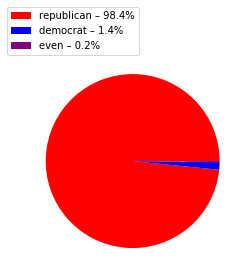

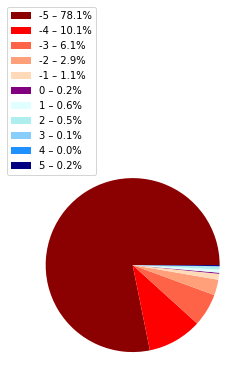

	Average white not hispanic: 92.4 +/- 3.3%
	Average black: 1.7 +/- 1.9%
	Average hispanic: 3.2 +/- 2.1%
	Average college educated: 17.6 +/- 4.4%
	Average poverty: 14.3 +/- 4.9%


cluster 1:
	Average partisan score: -3.6 +/- 2.4



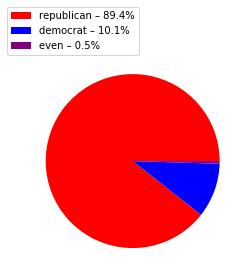

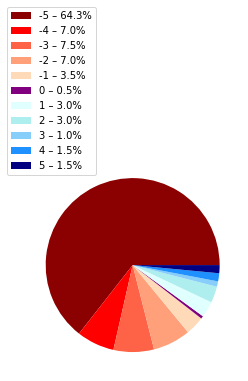

	Average white not hispanic: 62.0 +/- 6.6%
	Average black: 6.3 +/- 6.0%
	Average hispanic: 27.5 +/- 6.0%
	Average college educated: 20.1 +/- 6.8%
	Average poverty: 15.4 +/- 5.1%


cluster 2:
	Average partisan score: -2.9 +/- 1.9



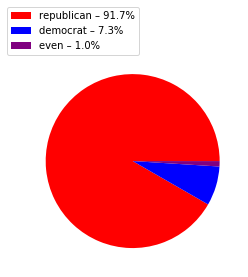

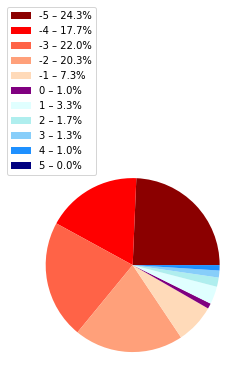

	Average white not hispanic: 59.7 +/- 6.6%
	Average black: 32.2 +/- 6.7%
	Average hispanic: 5.4 +/- 4.2%
	Average college educated: 17.1 +/- 6.1%
	Average poverty: 20.5 +/- 4.7%


cluster 3:
	Average partisan score: 2.5 +/- 2.0



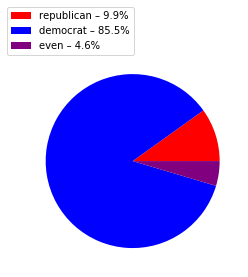

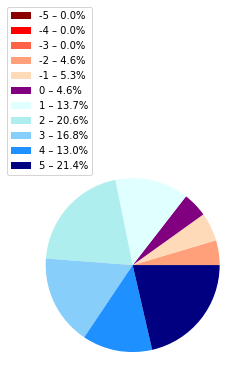

	Average white not hispanic: 35.5 +/- 9.2%
	Average black: 58.0 +/- 10.1%
	Average hispanic: 4.4 +/- 4.2%
	Average college educated: 16.5 +/- 7.0%
	Average poverty: 26.7 +/- 7.5%


cluster 4:
	Average partisan score: 2.5 +/- 3.0



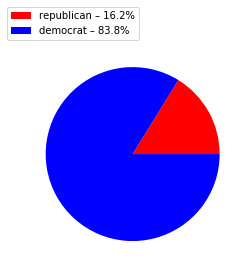

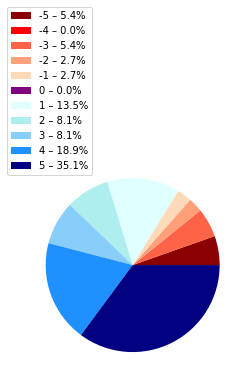

	Average white not hispanic: 14.2 +/- 7.4%
	Average black: 3.6 +/- 7.3%
	Average hispanic: 81.0 +/- 9.8%
	Average college educated: 14.5 +/- 5.6%
	Average poverty: 25.2 +/- 5.3%


cluster 5:
	Average partisan score: -4.2 +/- 1.6



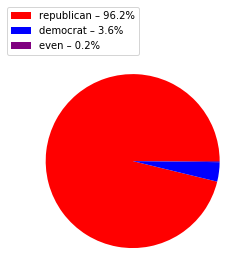

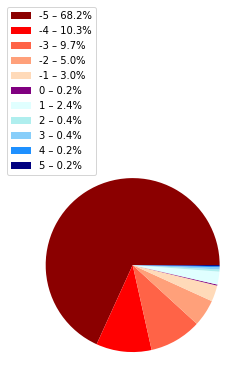

	Average white not hispanic: 76.8 +/- 5.4%
	Average black: 8.0 +/- 6.5%
	Average hispanic: 9.0 +/- 5.2%
	Average college educated: 19.1 +/- 5.2%
	Average poverty: 15.4 +/- 3.9%


cluster 6:
	Average partisan score: -2.2 +/- 2.8



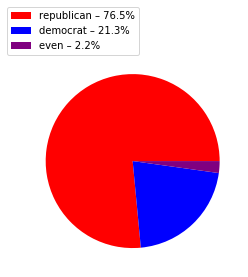

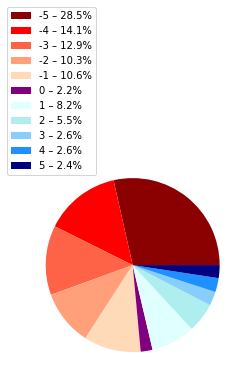

	Average white not hispanic: 85.7 +/- 5.7%
	Average black: 3.7 +/- 3.6%
	Average hispanic: 5.8 +/- 3.6%
	Average college educated: 34.4 +/- 7.5%
	Average poverty: 10.3 +/- 3.9%


cluster 7:
	Average partisan score: -0.5 +/- 3.3



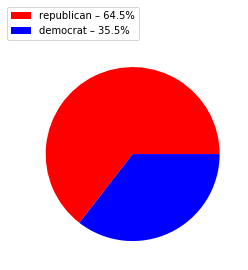

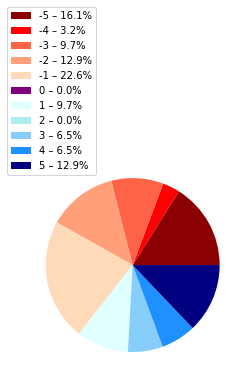

	Average white not hispanic: 30.8 +/- 14.5%
	Average black: 1.4 +/- 4.1%
	Average hispanic: 7.0 +/- 6.8%
	Average college educated: 16.0 +/- 3.3%
	Average poverty: 30.9 +/- 9.1%


cluster 8:
	Average partisan score: 1.7 +/- 2.9



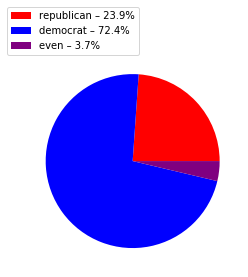

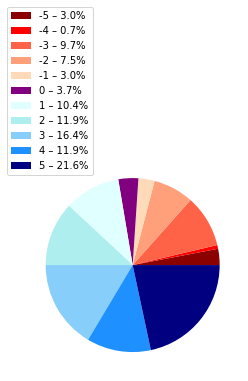

	Average white not hispanic: 56.5 +/- 12.2%
	Average black: 16.2 +/- 9.4%
	Average hispanic: 15.3 +/- 8.0%
	Average college educated: 42.0 +/- 9.4%
	Average poverty: 11.4 +/- 4.8%


cluster 9:
	Average partisan score: -2.7 +/- 3.1



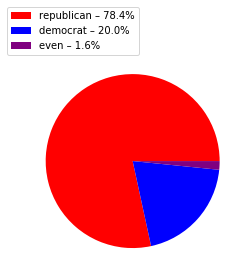

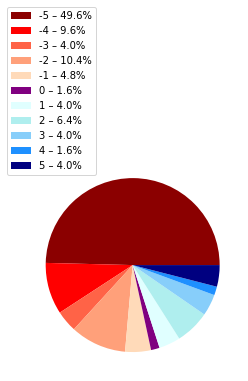

	Average white not hispanic: 40.5 +/- 7.8%
	Average black: 4.6 +/- 4.0%
	Average hispanic: 51.2 +/- 7.9%
	Average college educated: 18.1 +/- 6.6%
	Average poverty: 17.0 +/- 4.4%




In [24]:
clusters = KMeans(n_clusters=10).fit_predict(features)
print_cluster_info(clusters)

# Classification

## K-Nearest Neighbor

In [25]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=0)

In [27]:
classifier = neighbors.KNeighborsClassifier(metric="euclidean", n_neighbors=20)

In [28]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [29]:
classifier.score(X_test, y_test)

0.5884244372990354

## Compare different classifiers

In [40]:
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [41]:
nn = neighbors.KNeighborsClassifier(metric="euclidean", n_neighbors=20)
rbf_svm = svm.SVC(kernel="linear")
linear_svm = svm.SVC(kernel="rbf")
random_forest = ensemble.RandomForestClassifier(n_estimators=100)
decision_tree = tree.DecisionTreeClassifier()

In [42]:
nn.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)
linear_svm.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

/Users/brendankerivan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
nn.score(X_test, y_test)

0.5884244372990354

In [44]:
rbf_svm.score(X_test, y_test)

0.5811897106109325

In [45]:
linear_svm.score(X_test, y_test)

0.5538585209003215

In [46]:
random_forest.score(X_test, y_test)

0.5860128617363344

In [47]:
decision_tree.score(X_test, y_test)

0.47106109324758844